<a href="https://colab.research.google.com/github/ready2cook/Assignment-1-2025/blob/main/linar_regression_ass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')

In [ ]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
data['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [ ]:
data['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
data['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [ ]:
data['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

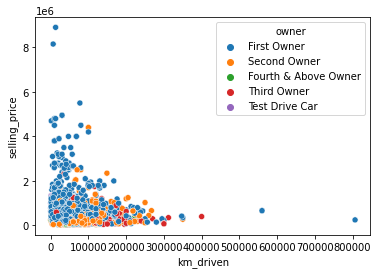

In [ ]:
sns.scatterplot(x='km_driven',y='selling_price',data=data,hue='owner')

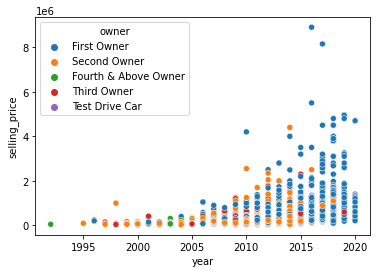

In [ ]:
sns.scatterplot(x= 'year',y='selling_price', data=data, hue='owner')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
data.fuel=le.fit_transform(data.fuel)
data.seller_type=le.fit_transform(data.seller_type)

In [ ]:

data.transmission=le.fit_transform(data.transmission)
data.owner=le.fit_transform(data.owner)

In [ ]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2


1st model including year

In [ ]:
x=data[['year','km_driven','fuel','seller_type','transmission','owner']]
y=data[['selling_price']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3)

In [ ]:
x_train.head()

,year,km_driven,fuel,seller_type,transmission,owner
2195,2014,76000,4,1,1,2
116,2016,60000,1,1,1,0
2682,2017,55000,4,1,1,0
3581,2017,70000,1,1,1,0
3173,2016,35000,4,1,1,0


In [ ]:
y_train.head()

,selling_price
2195,180000
116,780000
2682,350000
3581,720000
3173,300000


In [ ]:
x_test.head()


,year,km_driven,fuel,seller_type,transmission,owner
4073,2012,30000,4,1,1,4
4213,2015,135000,1,1,1,2
2058,2008,90000,4,1,1,2
3179,2010,102000,1,1,1,2
3360,2018,8000,4,0,1,0


In [ ]:
y_test.head()

,selling_price
4073,130000
4213,550000
2058,120000
3179,160000
3360,890000


In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_predict=lr.predict(x_test)
y_predict[ : 5]

array([[216840.97421317],
       [534166.86998664],
       [ 38816.68301293],
       [368884.50823568],
       [550711.1328952 ]])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test,y_predict)

211132156089.44467

In [ ]:
lr.intercept_

array([-76471835.83711801])

In [ ]:
lr.coef_

array([[ 3.87779456e+04, -8.66889894e-01, -8.76382042e+04,
        -2.39291371e+04, -8.73859411e+05, -1.45504425e+04]])

2nd model without using year


In [ ]:
x2=data[['km_driven','fuel','seller_type','transmission','owner']]
y2=data[['selling_price']]

In [ ]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [ ]:
x2_train.head()

,year,km_driven,fuel,seller_type,transmission,owner
1452,2014,90000,1,1,1,2
1457,2008,40000,4,1,1,0
1556,2012,10000,4,1,1,0
2204,2012,80000,1,1,1,2
3858,2018,21394,1,0,1,0


In [ ]:
x2_test.head()

,year,km_driven,fuel,seller_type,transmission,owner
1149,2016,30000,4,0,1,0
2245,2017,10510,4,0,0,0
4261,2006,100000,1,1,1,2
2865,2014,130000,1,1,0,0
3110,2018,60000,1,1,1,0


In [ ]:
lr.fit(x2_train,y2_train)

LinearRegression()

In [ ]:
y2_predict=lr.predict(x2_test)

In [ ]:
mean_squared_error(y2_test,y2_predict)

144907275556.1272